<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
# Data investigation

data = load_breast_cancer()
print(type(data),data.keys())

<class 'sklearn.utils.Bunch'> dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [33]:
# Checking dimensions of data
print(data.data.shape, data.target.shape)

(569, 30) (569,)


In [34]:
# Creating A and b variables

A = data.data
b = data.target

In [35]:
# Creating train test split
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,stratify=b)

In [36]:
# Feature Scaling

scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [37]:
# Constructing model
cmodel = tf.keras.models.Sequential()

cmodel.add(tf.keras.layers.Dense(1, input_shape=(A_train.shape[1],), activation='sigmoid'))

cmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Fitting model
clf = cmodel.fit(A_train,b_train, validation_data=(A_test,b_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.8767 - accuracy: 0.4734 - val_loss: 0.7786 - val_accuracy: 0.5000
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7705 - accuracy: 0.5510 - val_loss: 0.6936 - val_accuracy: 0.5702
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.6208 - val_loss: 0.6202 - val_accuracy: 0.6404
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.6533 - val_loss: 0.5570 - val_accuracy: 0.6754
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6193 - accuracy: 0.6938 - val_loss: 0.5066 - val_accuracy: 0.7281
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5286 - accuracy: 0.7570 - val_loss: 0.4635 - val_accuracy: 0.7807
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4911 - accuracy: 0.7812 - val_loss: 0.4279 - val_accuracy: 0.8421
Epoch 8/100


In [38]:
# Evaluating model

print('Train Loss & Accuracy:', cmodel.evaluate(A_train,b_train))
print('Test Loss & Accuracy:', cmodel.evaluate(A_test,b_test))

15/15 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9780
Train Loss & Accuracy: [0.09359262138605118, 0.9780219793319702]
4/4 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9737
Test Loss & Accuracy: [0.08524789661169052, 0.9736841917037964]


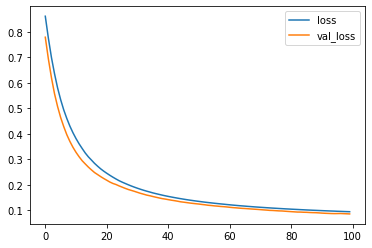

In [39]:
# Plotting model performance

plt.plot(clf.history['loss'], label='loss')
plt.plot(clf.history['val_loss'], label='val_loss')
plt.legend()

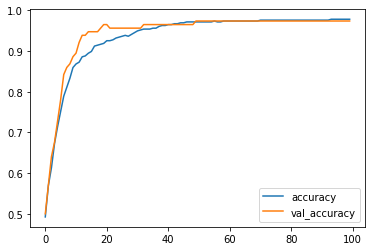

In [40]:
# Plotting model performance

plt.plot(clf.history['accuracy'], label='accuracy')
plt.plot(clf.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [41]:
# Making a Prediction

prediction = cmodel.predict(A_test)
prediction

array([[8.3704257e-01],
       [9.9965262e-01],
       [9.0219486e-01],
       [8.0674312e-05],
       [9.6568173e-01],
       [9.9182546e-01],
       [9.9225301e-01],
       [8.0334306e-01],
       [4.2815547e-02],
       [9.9562269e-01],
       [3.2530054e-02],
       [9.8496282e-01],
       [8.2509768e-01],
       [2.5126401e-01],
       [9.2380869e-01],
       [8.7912297e-01],
       [9.9186558e-01],
       [9.1892129e-01],
       [1.2890623e-02],
       [3.2175265e-04],
       [9.3242800e-01],
       [9.9584454e-01],
       [7.9193932e-01],
       [9.8784190e-01],
       [1.1550950e-02],
       [9.8792505e-01],
       [6.1385904e-04],
       [5.0591243e-06],
       [8.7412959e-01],
       [1.0855414e-05],
       [8.4240186e-01],
       [8.2506919e-01],
       [9.0046859e-01],
       [1.0034315e-02],
       [4.0387783e-02],
       [6.1694539e-01],
       [2.1106498e-02],
       [1.8000884e-01],
       [1.1411476e-03],
       [9.8288465e-01],
       [9.9903679e-01],
       [3.442974

In [42]:
# Rounding predicted values & evaluating model preformace

ypred = np.round(prediction).flatten()
print(f"Classification Model Perfomance:\nLoss: {cmodel.evaluate(A_test,b_test)[0]}\nAccuracy: {round(cmodel.evaluate(A_test,b_test)[1]*100,2)}%")

4/4 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9737
Classification Model Perfomance:
Loss: 0.08524789661169052
Accuracy: 97.37%


In [44]:
# Saving Model

cmodel.save('LinearClassifier.h5')

# Checking model loading

model = tf.keras.models.load_model('LinearClassifier.h5')
print(model.layers)
model.evaluate(A_test, b_test)

# Downloading Model

from google.colab import files
files.download('LinearClassifier.h5')

4/4 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9737


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>